In [ ]:
install.packages("cowplot")
install.packages("kknn")
install.packages("themis")
install.packages("rsample")

In [ ]:
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)
library(cowplot)
library(themis)
library(rsample)

In [58]:
wine <- read_csv('https://raw.githubusercontent.com/qinhan099/DSCI100_Group15_Spotify/main/winequality-red.csv')
any(is.na(wine))

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] FALSE

In [59]:
t <- wine %>%
    mutate(quality = as.factor(quality))
head(t, n = 5)

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5

In [25]:
set.seed(20)
wine_split <- initial_split(t, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split) 


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


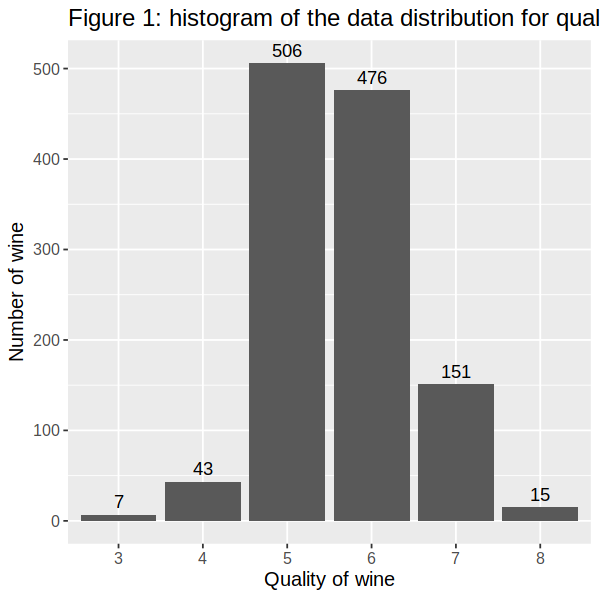

In [26]:
options(repr.plot.width=5, repr.plot.height=5)
quality_distribution <- group_by(wine_train, quality) |> summarize(count=n())

quality_plot <- ggplot(wine_train, aes(x=quality)) + 
    geom_histogram(stat="count") +
    geom_text(data=quality_distribution, aes(label=count, y=count), vjust=-0.5) +
    labs(x = "Quality of wine", y = "Number of wine") +
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 1: histogram of the data distribution for quality.")

print(quality_plot)

In [27]:
columns_to_mean <- c("fixed_acidity", "volatile_acidity", "citric_acid", 
                     "residual_sugar", "chlorides", "free_sulfur_dioxide", 
                     "total_sulfur_dioxide", "density","pH","sulphates","alcohol")

mean_values <- wine_train %>%
  group_by(quality) %>%
  summarize(across(all_of(columns_to_mean), mean, .names = "mean_{.col}"))

mean_values

quality mean_fixed_acidity mean_volatile_acidity mean_citric_acid
1 3       8.257143           0.8950000             0.1500000       
2 4       7.883721           0.6791860             0.1711628       
3 5       8.161067           0.5742490             0.2426285       
4 6       8.402941           0.4931723             0.2802311       
5 7       8.930464           0.4084768             0.3806623       
6 8       8.313333           0.4226667             0.3820000       
  mean_residual_sugar mean_chlorides mean_free_sulfur_dioxide
1 2.671429            0.11242857     11.28571                
2 2.813953            0.09253488     13.16279                
3 2.560672            0.09279447     17.08696                
4 2.463655            0.08486765     15.48424                
5 2.710596            0.07523841     14.12252                
6 2.673333            0.06826667     12.80000                
  mean_total_sulfur_dioxide mean_density mean_pH  mean_sulphates mean_alcohol
1 22.71429                  0.9975043    3.397143 0.5828571      10.007143   
2 38.06977                  0.9966644    3.369070 0.6213953      10.258140   
3 56.53854                  0.9971140    3.307233 0.6231818       9.892885   
4 40.51891                  0.9966735    3.316513 0.6766807      10.629622   
5 34.20530                  0.9961105    3.287152 0.7442384      11.555740   
6 34.13333                  0.9950887    3.284000 0.7713333      12.180000

In [28]:
plot_volatile_acidity <- ggplot(wine_train, aes(y=volatile_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="volatile acidity")+
    ggtitle("Figure 2: Box plot of volatile acidity versus quality.")

In [29]:
plot_fixed_acidity <- ggplot(wine_train, aes(y=fixed_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="fixed acidity")+
    ggtitle("Figure 3: Box plot of fixed acidity versus quality.")

In [30]:
plot_citric_acid <- ggplot(wine_train, aes(y=citric_acid, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="citric acid")+
    ggtitle("Figure 4: Box plot of citric acid versus quality.")

In [31]:
plot_residual_sugar <- ggplot(wine_train, aes(y=residual_sugar, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="residual sugar")+
    ggtitle("Figure 5: Box plot of residual sugar versus quality.")

In [32]:
plot_chlorides <- ggplot(wine_train, aes(y=chlorides, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="chlorides")+
    ggtitle("Figure 6: Box plot of chlorides versus quality.")

In [33]:
plot_free_sulfur_dioxide <- ggplot(wine_train, aes(y=free_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free sulfur dioxide")+
    ggtitle("Figure 7: Box plot of free sulfur dioxide versus quality.")

In [34]:
plot_total_sulfur_dioxide <- ggplot(wine_train, aes(y=total_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free total sulfur dioxide")+
    ggtitle("Figure 8: Box plot-free total sulfur dioxide versus quality.")

In [35]:
plot_density <- ggplot(wine_train, aes(y=density, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="density dioxide")+
    ggtitle("Figure 9: Box plot of density versus quality.")

In [36]:
plot_pH <- ggplot(wine_train, aes(y=pH, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="pH")+
    ggtitle("Figure 10: Box plot of pH versus quality.")

In [37]:
plot_sulphates <- ggplot(wine_train, aes(y=sulphates, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="sulphates")+
    ggtitle("Figure 11: Box plot of sulphates versus quality.")

In [38]:
plot_alcohol <- ggplot(wine_train, aes(y=alcohol, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="alcohol")+
    ggtitle("Figure 12: Box plot of alcohol versus quality.")

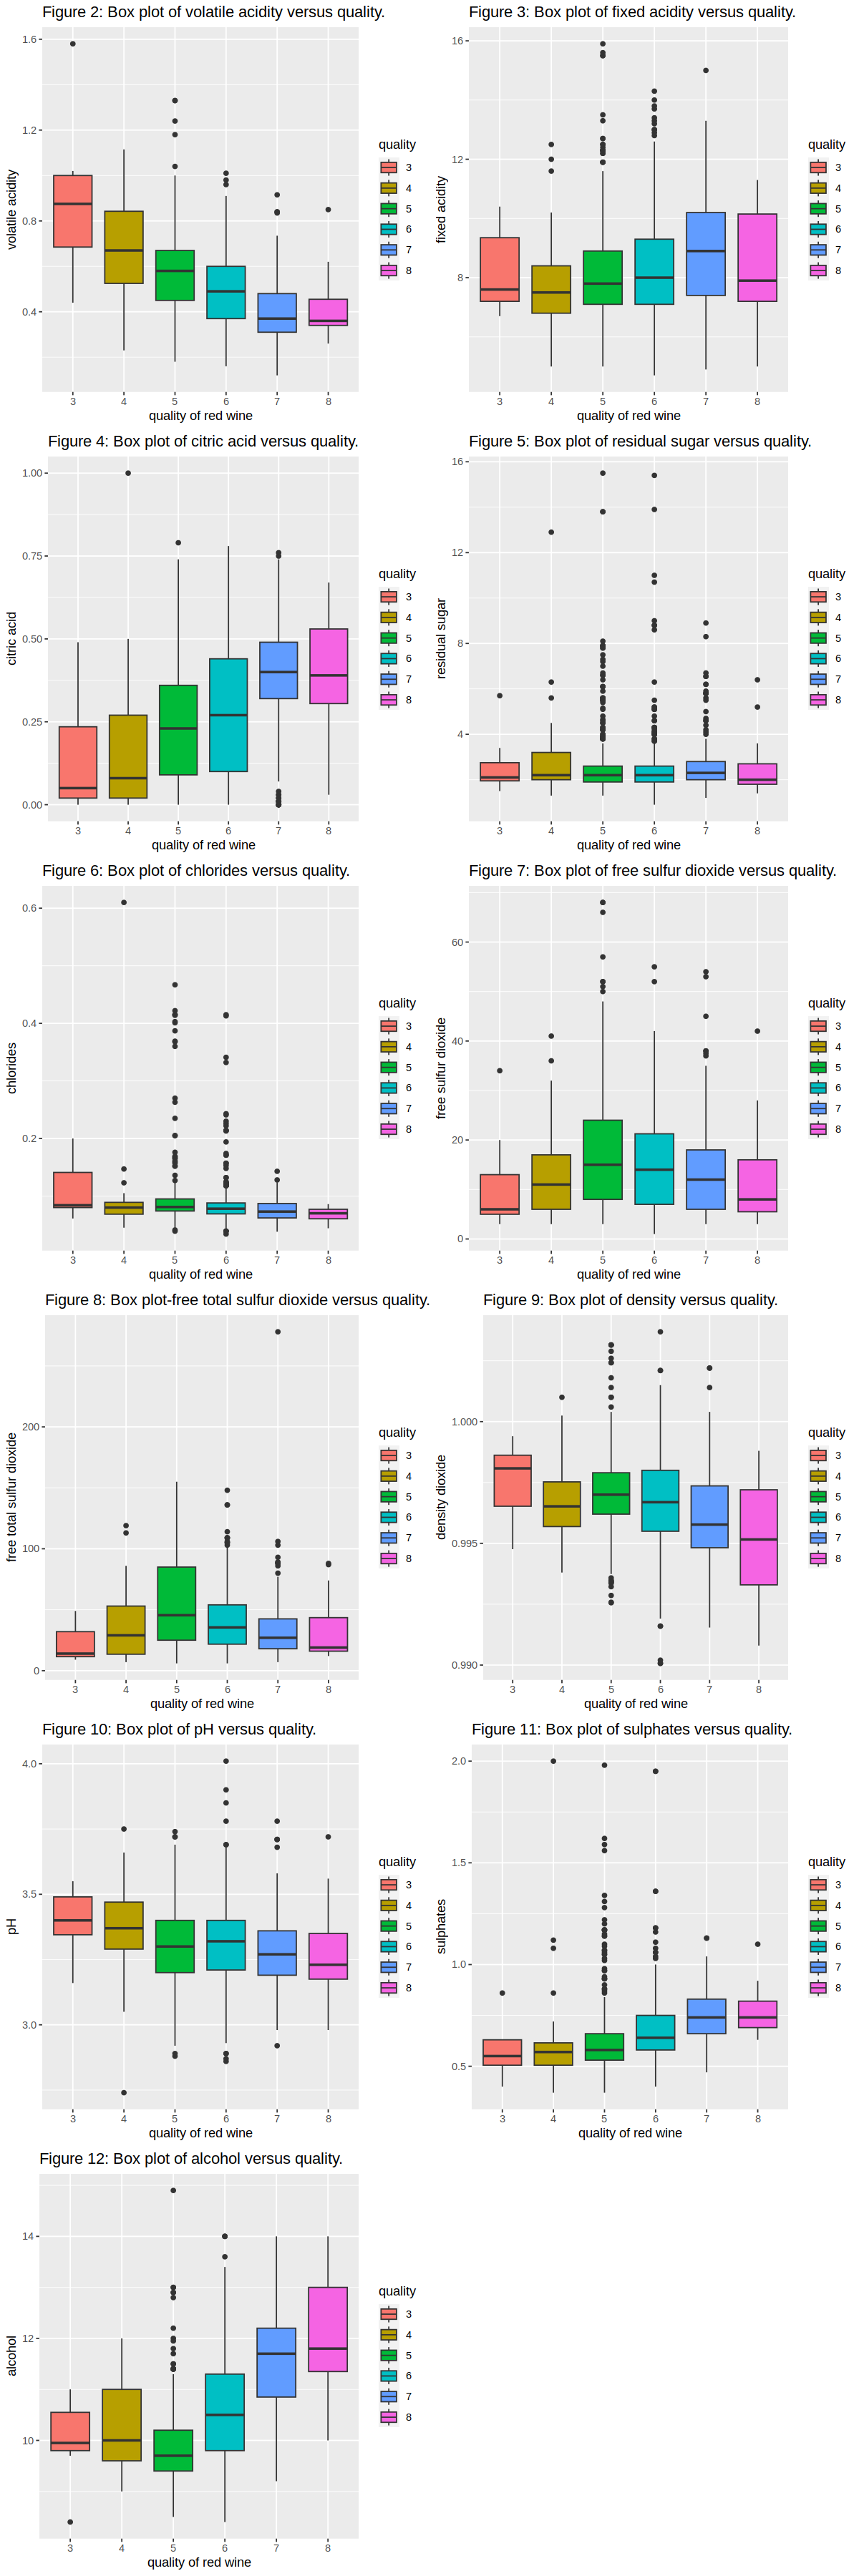

In [39]:
options(repr.plot.width=10, repr.plot.height=30)
plot_grid(plot_volatile_acidity , plot_fixed_acidity,
          plot_citric_acid, plot_residual_sugar, 
          plot_chlorides, plot_free_sulfur_dioxide,
          plot_total_sulfur_dioxide , plot_density,
          plot_pH, plot_sulphates,
          plot_alcohol,ncol = 2)
          

In [40]:
selected_train_based_on_EDA <- wine_train %>%
    select(quality, citric_acid, volatile_acidity,alcohol)

In [57]:
up_sample_train <- recipe(quality ~ ., data= selected_train_based_on_EDA) |>
    step_upsample(quality, over_ratio = 1, skip = FALSE) |>
    prep() |>
    bake(selected_train_based_on_EDA)

head(up_sample_train)

citric_acid volatile_acidity alcohol quality
1 0.02        1.02             11.00   3      
2 0.05        0.98              9.70   3      
3 0.02        1.02             11.00   3      
4 0.42        0.44              9.90   3      
5 0.02        0.76              9.95   3      
6 0.00        1.58             10.90   3

In [46]:
set.seed(2020)

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by=1))

wine_vfold <- vfold_cv(up_sample_train, v = 5, strata = quality)

wine_recipe <- recipe(quality ~ citric_acid + volatile_acidity + alcohol, 
                        data = up_sample_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid=k_vals)

accuracies1 <- knn_fit %>% collect_metrics()


accuracies <- accuracies1 |>
  filter(.metric == "accuracy")

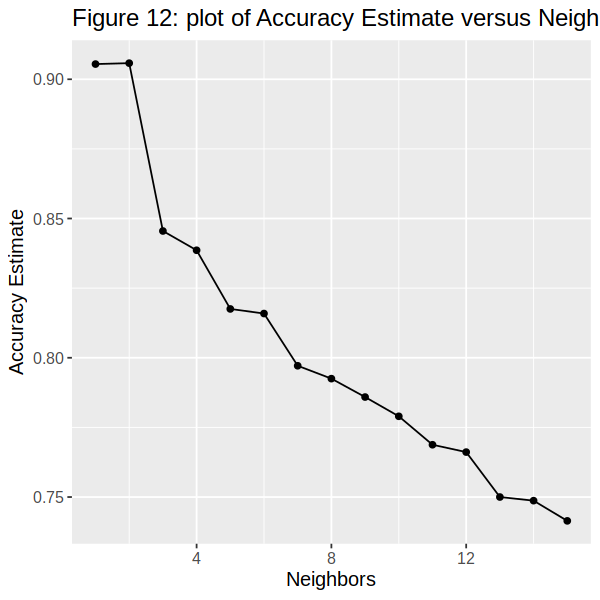

In [66]:
options(repr.plot.width=5, repr.plot.height=5)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: plot of Accuracy Estimate versus Neighbors.")

accuracy_vs_k

In [60]:
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

wine_fit <- workflow() |>
       add_recipe(wine_recipe) |>
       add_model(knn_spec) |>
       fit(data = up_sample_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1577734
Best kernel: rectangular
Best k: 4

In [61]:
set.seed(2020)
wine_test_predictions <- predict(wine_fit , wine_test) |>
       bind_cols(wine_test)

head(wine_test_predictions, n = 5)

.pred_class fixed_acidity volatile_acidity citric_acid residual_sugar
1 5           7.8           0.580            0.02        2.0           
2 5           5.6           0.615            0.00        1.6           
3 5           8.9           0.620            0.19        3.9           
4 7           7.6           0.390            0.31        2.3           
5 5           7.9           0.430            0.21        1.6           
  chlorides free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates
1 0.073      9                   18                  0.9968  3.36 0.57     
2 0.089     16                   59                  0.9943  3.58 0.52     
3 0.170     51                  148                  0.9986  3.17 0.93     
4 0.082     23                   71                  0.9982  3.52 0.65     
5 0.106     10                   37                  0.9966  3.17 0.91     
  alcohol quality
1 9.5     7      
2 9.9     5      
3 9.2     5      
4 9.7     5      
5 9.5     5

In [62]:
set.seed(2020) 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = quality, estimate = .pred_class) 
wine_prediction_accuracy


.metric  .estimator .estimate
1 accuracy multiclass 0.4962594
2 kap      multiclass 0.2439118

In [63]:
set.seed(2020)
wine_mat <- wine_test_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)
wine_mat

          Truth
Prediction   3   4   5   6   7   8
         3   0   2   0   1   0   0
         4   0   3  15  12   1   0
         5   3   3 102  51   6   0
         6   0   1  48  68  13   2
         7   0   1   9  27  26   1
         8   0   0   1   3   2   0

In [64]:
volatile_acidity_vs_citric_acid_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 13: Scatter plot of citric acid versus volatile acidity using predicting data.")

volatile_acidity_vs_citric_acid <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 14: Scatter plot of citric acid versus volatile acidity using predicting data.")


volatile_acidity_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 15: Scatter plot of alcohol versus volatile acidity using predicting data.")

volatile_acidity_vs_alcohol <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 16: Scatter plot of alcohol versus volatile acidity using predicting data.")

citric_acid_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = citric_acid, y = alcohol, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 17: Scatter plot of citric acid versus alcohol using predicting data.")

citric_acid_vs_alcohol <- wine_test |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 18: Scatter plot of citric acid versus alcohol using predicting data.")


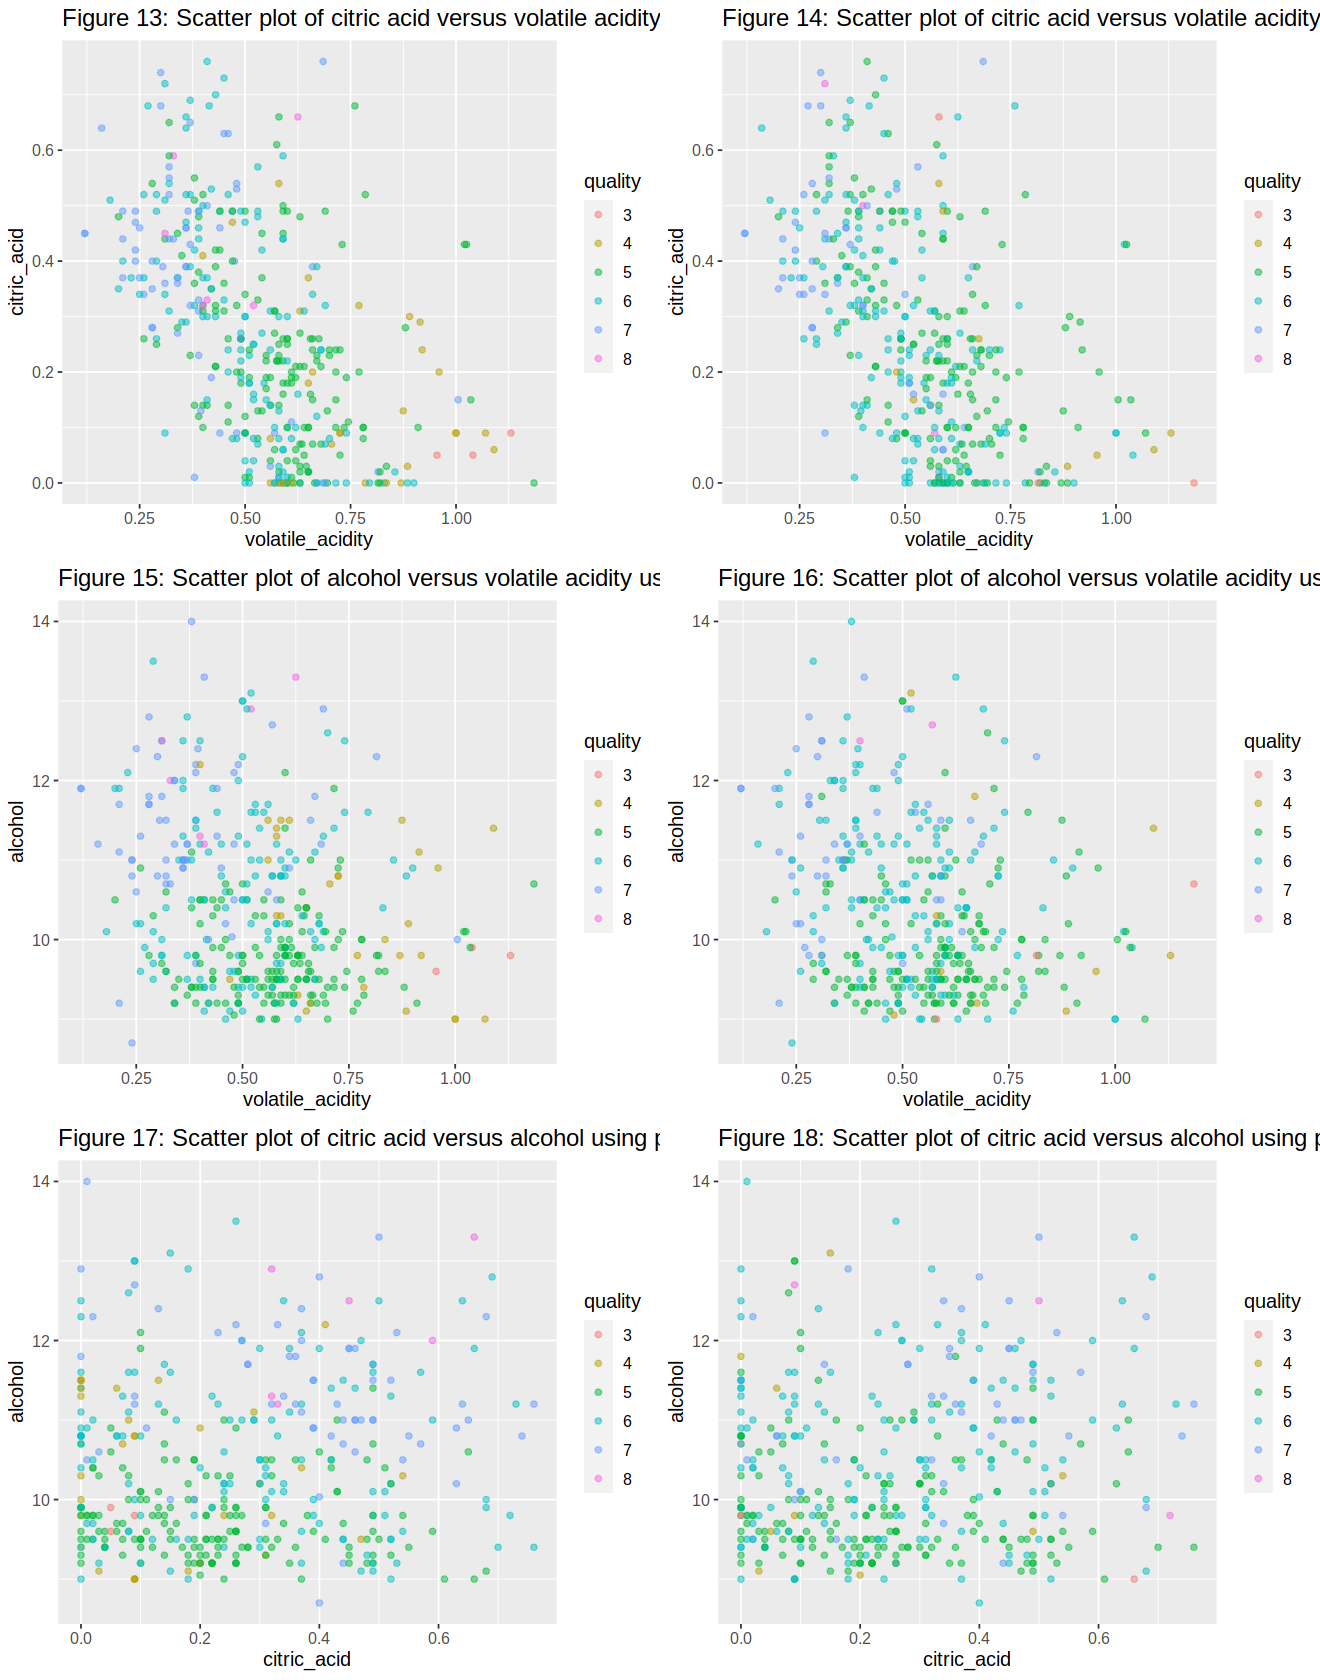

In [65]:
options(repr.plot.width=11, repr.plot.height=14)
plot_grid(volatile_acidity_vs_citric_acid_prediction , volatile_acidity_vs_citric_acid, 
          volatile_acidity_vs_alcohol_prediction , volatile_acidity_vs_alcohol,
          citric_acid_vs_alcohol_prediction, citric_acid_vs_alcohol,
          ncol = 2)